# Klasifikasi Data IMBALANCE

## Import Library

In [27]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


## Membagi data train dan test

In [28]:
ecoli_imbalance = pd.read_csv("../dataset/ecoli.csv")
ecoli_imbalance

,Unnamed: 0,name,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...,...
331,331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


## Fitur Dan Target

Fitur: 
- mcg
- gvh
- lip 
- chg
- chg
- aac
- alm1
- alm2

Target:  
- class

In [29]:
fitur = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]
target = ["class"]

## Pemisahan Data
data training: **80%**  
data test: **20%**

In [30]:
X = ecoli_imbalance[fitur]
y = ecoli_imbalance[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [31]:
data_train = X_train.merge(y_train, left_index=True, right_index=True)
data_train

,mcg,gvh,lip,chg,aac,alm1,alm2,class
53,0.23,0.58,0.48,0.5,0.37,0.53,0.59,cp
43,0.28,0.38,0.48,0.5,0.50,0.33,0.42,cp
166,0.54,0.57,0.48,0.5,0.56,0.81,0.83,im
130,0.00,0.38,0.48,0.5,0.42,0.48,0.55,cp
188,0.12,0.43,0.48,0.5,0.63,0.70,0.74,im
...,...,...,...,...,...,...,...,...
289,0.72,0.86,0.48,0.5,0.17,0.55,0.21,pp
42,0.40,0.50,0.48,0.5,0.45,0.39,0.47,cp
230,0.75,0.37,0.48,0.5,0.64,0.70,0.74,imU
119,0.29,0.28,0.48,0.5,0.50,0.42,0.50,cp


In [32]:
data_test = X_test.merge(y_test, left_index=True, right_index=True)
data_test

,mcg,gvh,lip,chg,aac,alm1,alm2,class
260,0.63,0.69,0.48,0.5,0.65,0.41,0.28,om
227,0.69,0.43,0.48,0.5,0.59,0.74,0.77,imU
157,0.84,0.44,0.48,0.5,0.48,0.71,0.74,im
320,0.68,0.67,0.48,0.5,0.49,0.40,0.34,pp
137,0.26,0.40,0.48,0.5,0.36,0.26,0.37,cp
...,...,...,...,...,...,...,...,...
121,0.24,0.41,0.48,0.5,0.49,0.23,0.34,cp
201,0.36,0.47,0.48,0.5,0.51,0.69,0.72,im
284,0.74,0.49,0.48,0.5,0.42,0.54,0.36,pp
151,0.52,0.39,0.48,0.5,0.65,0.71,0.73,im


## Klasifikasi menggunakan Naive Bayes

In [33]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred = naive_bayes_model.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
laporan_klasifikasi = classification_report(y_test, y_pred, zero_division=0)
print(f"Akurasi Model Naive Bayes: {akurasi:.2f}")
print("\nLaporan Klasifikasi:")
print(laporan_klasifikasi)

Akurasi Model Naive Bayes: 0.79

Laporan Klasifikasi:
              precision    recall  f1-score   support

          cp       0.91      1.00      0.96        43
          im       0.75      0.65      0.70        23
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.62      0.50      0.56        10
          om       0.00      0.00      0.00         6
         omL       0.50      1.00      0.67         1
          pp       0.67      1.00      0.80        16

    accuracy                           0.79       101
   macro avg       0.43      0.52      0.46       101
weighted avg       0.73      0.79      0.75       101



d:\python\python3.11\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


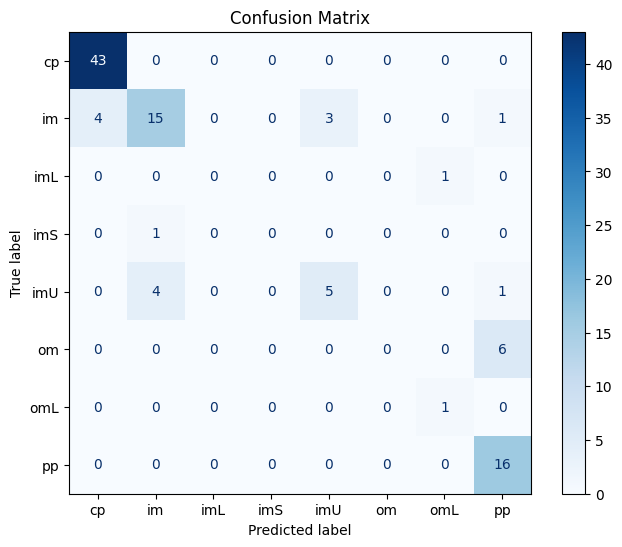

In [34]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=naive_bayes_model.classes_) 

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

## Klasifikasi dengan RandomForest

In [35]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
akurasi_random_forest = accuracy_score(y_test, y_pred_random_forest)
laporan_random_forest = classification_report(y_test, y_pred_random_forest, zero_division=0)

print(f"Akurasi: {akurasi_random_forest:.2f}")
print("Laporan random forest: \n", laporan_random_forest)

d:\python\python3.11\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Akurasi: 0.82
Laporan random forest: 
               precision    recall  f1-score   support

          cp       0.93      1.00      0.97        43
          im       0.73      0.70      0.71        23
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.46      0.60      0.52        10
          om       1.00      0.83      0.91         6
         omL       0.50      1.00      0.67         1
          pp       0.92      0.75      0.83        16

    accuracy                           0.82       101
   macro avg       0.57      0.61      0.58       101
weighted avg       0.82      0.82      0.82       101



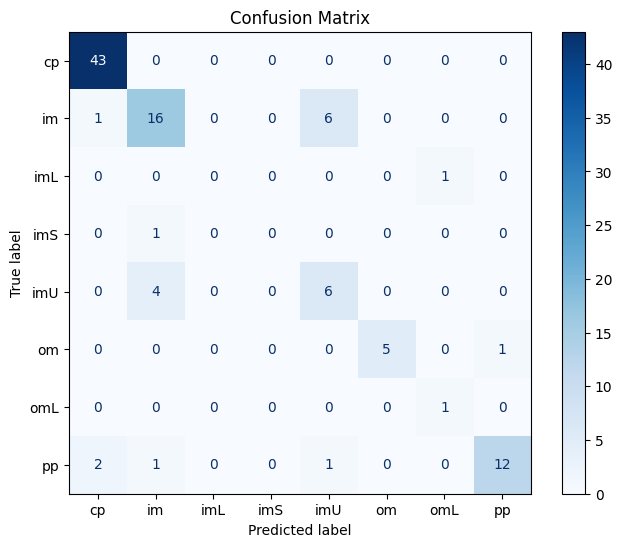

In [36]:
cm = confusion_matrix(y_test, y_pred_random_forest)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=random_forest_model.classes_) 

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

## Bagging dengan Naive Bayes estimator

In [37]:
bagging_nb = BaggingClassifier(n_estimators=100, estimator=GaussianNB(), random_state=42)
bagging_nb.fit(X_train, y_train)
y_pred_bagging_nb = bagging_nb.predict(X_test)
akurasi_bagging_nb = accuracy_score(y_test, y_pred_bagging_nb)
laporan_bagging_nb = classification_report(y_test, y_pred_bagging_nb, zero_division=0)
print(f"Akurasi: {akurasi_bagging_nb:.2f}")
print("Laporan bagging NB: \n", laporan_bagging_nb)


d:\python\python3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi: 0.82
Laporan bagging NB: 
               precision    recall  f1-score   support

          cp       0.91      1.00      0.96        43
          im       0.75      0.65      0.70        23
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.62      0.50      0.56        10
          om       1.00      0.50      0.67         6
         omL       0.50      1.00      0.67         1
          pp       0.76      1.00      0.86        16

    accuracy                           0.82       101
   macro avg       0.57      0.58      0.55       101
weighted avg       0.81      0.82      0.80       101



d:\python\python3.11\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\python\python3.11\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\python\python3.11\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\python\python3.11\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\python\python3.11\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\python\python3.11\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\python\python3.11\Lib\site-packages\sklearn\naive_bayes

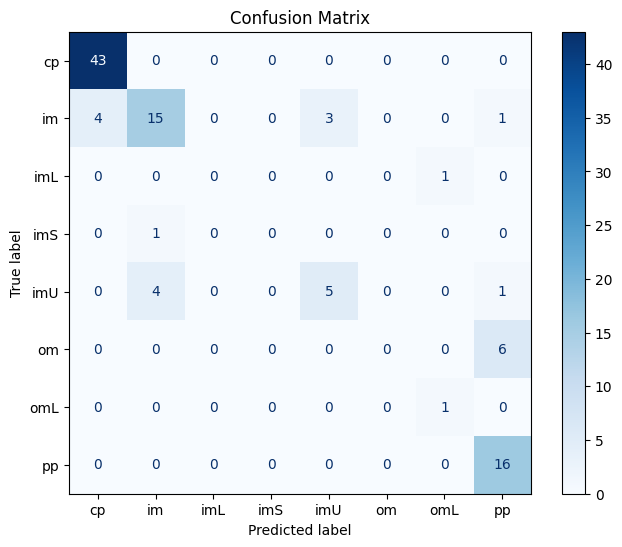

In [38]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=bagging_nb.classes_) 

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

## Bagging menggunakan DecissionTree estimator

In [39]:
bagging_dt = BaggingClassifier(n_estimators=100, estimator=DecisionTreeClassifier(), random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_bagging_dt = bagging_dt.predict(X_test)
akurasi_bagging_dt = accuracy_score(y_test, y_pred_bagging_dt)
laporan_bagging_dt = classification_report(y_test, y_pred_bagging_dt)
print(f"Akurasi: {akurasi_bagging_dt:.2f}")
print("Laporan random forest: \n", laporan_bagging_dt)

d:\python\python3.11\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi: 0.82
Laporan random forest: 
               precision    recall  f1-score   support

          cp       0.91      1.00      0.96        43
          im       0.70      0.70      0.70        23
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.46      0.60      0.52        10
          om       1.00      1.00      1.00         6
         omL       1.00      1.00      1.00         1
          pp       1.00      0.69      0.81        16

    accuracy                           0.82       101
   macro avg       0.63      0.62      0.62       101
weighted avg       0.82      0.82      0.82       101



d:\python\python3.11\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\python\python3.11\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\python\python3.11\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


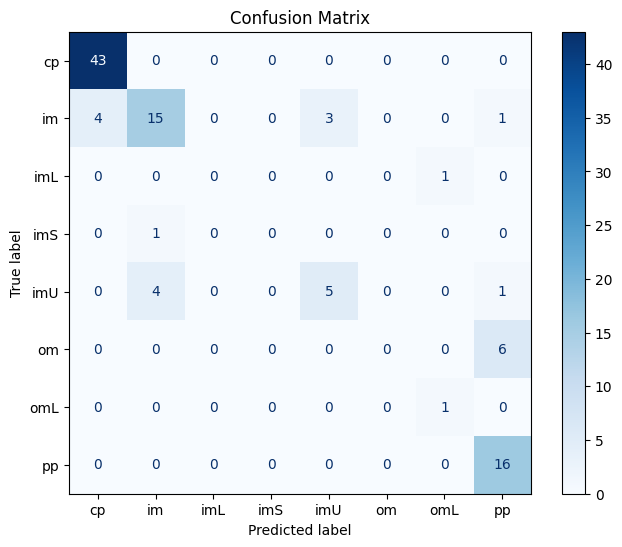

In [40]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=bagging_dt.classes_) 

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

## Table Perbandingan Model

In [ ]:
akurasi_table = pd.DataFrame(
    [
     ["Naive Bayes", akurasi],
     ["Random Forest", akurasi_random_forest],
     ["Bagging Naive Bayes", akurasi_bagging_nb],
     ["Bagging Decission Tree", akurasi_bagging_dt]
    ],
    columns=["Model", "Akurasi Model"],
    index=None
)

akurasi_table.style.hide(axis="index").format({
    "Akurasi Model": "{:.3f}"
})

Model,Akurasi Model
Naive Bayes,0.792
Random Forest,0.822
Bagging Naive Bayes,0.822
akurasi_bagging_dt,0.822
